# Project M1&M2 Basic Setup

In [24]:
#import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from tabulate import tabulate

In [2]:
#read corona data, drop unused columns and format date
df_corona = pd.read_csv("Corona_Data.csv", header=0, names=["date", "day", "month", "year", "cases", "deaths", "country", 
                                                              "geoID", "countrycode", "population", "continent", "cases_per100k_2_weeks"])

df_corona.drop(labels=["day", "month", "year"], axis=1, inplace=True)

df_corona["date"]=pd.to_datetime(df_corona["date"], format="%d/%m/%Y")


In [3]:
#create country-specific corona dataframes
#countries: United_States_of_America, China, Japan, Germany, India, United_Kingdom, France, Italy, Brazil, Canada]

#USA
df_corona_usa = df_corona[df_corona["country"]=="United_States_of_America"]

#China
df_corona_china=df_corona[df_corona["country"]=="China"]

#Japan
df_corona_japan=df_corona[df_corona["country"]=="Japan"]

#Germany
df_corona_germany=df_corona[df_corona["country"]=="Germany"]

#India
df_corona_india=df_corona[df_corona["country"]=="India"]

#UK
df_corona_uk=df_corona[df_corona["country"]=="United_Kingdom"]

#France
df_corona_france=df_corona[df_corona["country"]=="France"]

#Italy
df_corona_italy=df_corona[df_corona["country"]=="Italy"]

#Brazil
df_corona_brazil=df_corona[df_corona["country"]=="Brazil"]

#Canada
df_corona_canada=df_corona[df_corona["country"]=="Canada"]


In [4]:
df_corona_usa.tail(10)

,date,cases,deaths,country,geoID,countrycode,population,continent,cases_per100k_2_weeks
45034,2020-01-09,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45035,2020-01-08,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45036,2020-01-07,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45037,2020-01-06,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45038,2020-01-05,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45039,2020-01-04,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45040,2020-01-03,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45041,2020-01-02,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45042,2020-01-01,0,0,United_States_of_America,US,USA,329064917.0,America,NaN
45043,2019-12-31,0,0,United_States_of_America,US,USA,329064917.0,America,NaN


In [5]:
#set the correct date index on all country-specific corona dataframes and clean up NaN values resulting from that

#list of all dataframes
list=[df_corona_usa, df_corona_china, df_corona_japan, df_corona_germany, df_corona_india, df_corona_uk, df_corona_france, df_corona_italy, df_corona_brazil, df_corona_canada]


#set date as the index and sort by date
for i in list:
    i.set_index("date", inplace=True)
    i.sort_index(inplace=True)

    
#generate correct time-series from 01.10.2019 to 30.09.2020
t_series = pd.date_range(start='2019/10/01', end='2020/09/30')
t_index = pd.DatetimeIndex(t_series)



#replace date index with time series and fill NaN
df_corona_usa = df_corona_usa.reindex(t_index).fillna(method="bfill")

df_corona_china = df_corona_china.reindex(t_index)  #special cleanup for china needed, since china starts count with cases already present
df_corona_china.loc["2019-12-30", "cases"]=0
df_corona_china.fillna(method="bfill", inplace=True)

df_corona_japan = df_corona_japan.reindex(t_index).fillna(method="bfill")

df_corona_germany = df_corona_germany.reindex(t_index).fillna(method="bfill")

df_corona_india = df_corona_india.reindex(t_index).fillna(method="bfill")

df_corona_uk = df_corona_uk.reindex(t_index).fillna(method="bfill")

df_corona_france = df_corona_france.reindex(t_index).fillna(method="bfill")

df_corona_italy = df_corona_italy.reindex(t_index).fillna(method="bfill")

df_corona_brazil = df_corona_brazil.reindex(t_index).fillna(method="bfill")

df_corona_canada = df_corona_canada.reindex(t_index).fillna(method="bfill")



    

<ipython-input-5-02824015c4b0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.sort_index(inplace=True)


## Plot cases and deaths per day (single occurence and cumulated)

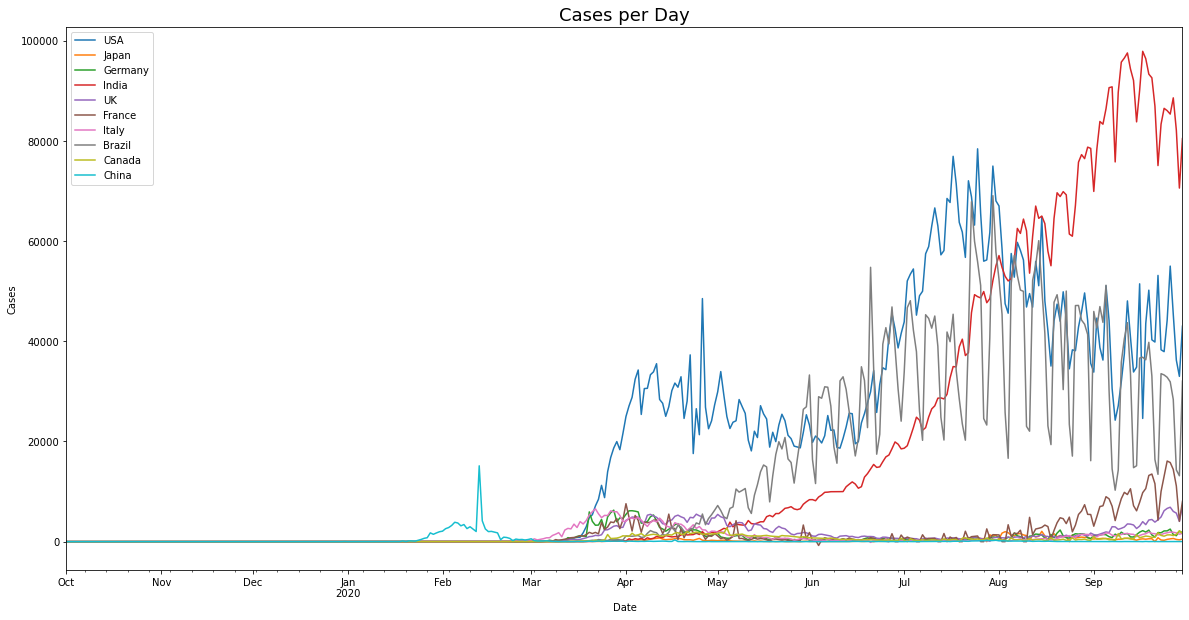

In [6]:
#cases per day

plt.figure(figsize=(20,10))
ax = df_corona_usa["cases"].plot(label="USA")
df_corona_japan["cases"].plot(label="Japan")
df_corona_germany["cases"].plot(label="Germany")
df_corona_india["cases"].plot(label="India")
df_corona_uk["cases"].plot(label="UK")
df_corona_france["cases"].plot(label="France")
df_corona_italy["cases"].plot(label="Italy")
df_corona_brazil["cases"].plot(label="Brazil")
df_corona_canada["cases"].plot(label="Canada")
df_corona_china["cases"].plot(label="China")
ax.set_ylabel("Cases")
ax.set_xlabel("Date")
ax.set_title("Cases per Day", fontsize=18)
plt.legend(loc=2)
plt.show()

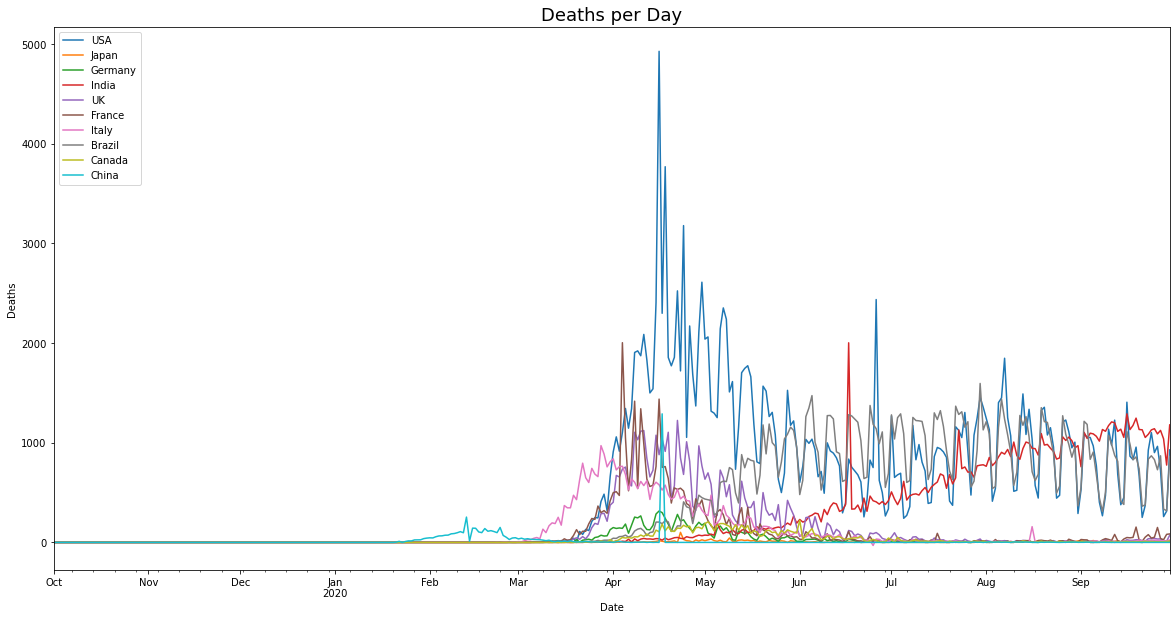

In [7]:
#deaths per day

plt.figure(figsize=(20,10))
ax = df_corona_usa["deaths"].plot(label="USA")
df_corona_japan["deaths"].plot(label="Japan")
df_corona_germany["deaths"].plot(label="Germany")
df_corona_india["deaths"].plot(label="India")
df_corona_uk["deaths"].plot(label="UK")
df_corona_france["deaths"].plot(label="France")
df_corona_italy["deaths"].plot(label="Italy")
df_corona_brazil["deaths"].plot(label="Brazil")
df_corona_canada["deaths"].plot(label="Canada")
df_corona_china["deaths"].plot(label="China")
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
ax.set_title("Deaths per Day", fontsize=18)
plt.legend(loc=2)
plt.show()


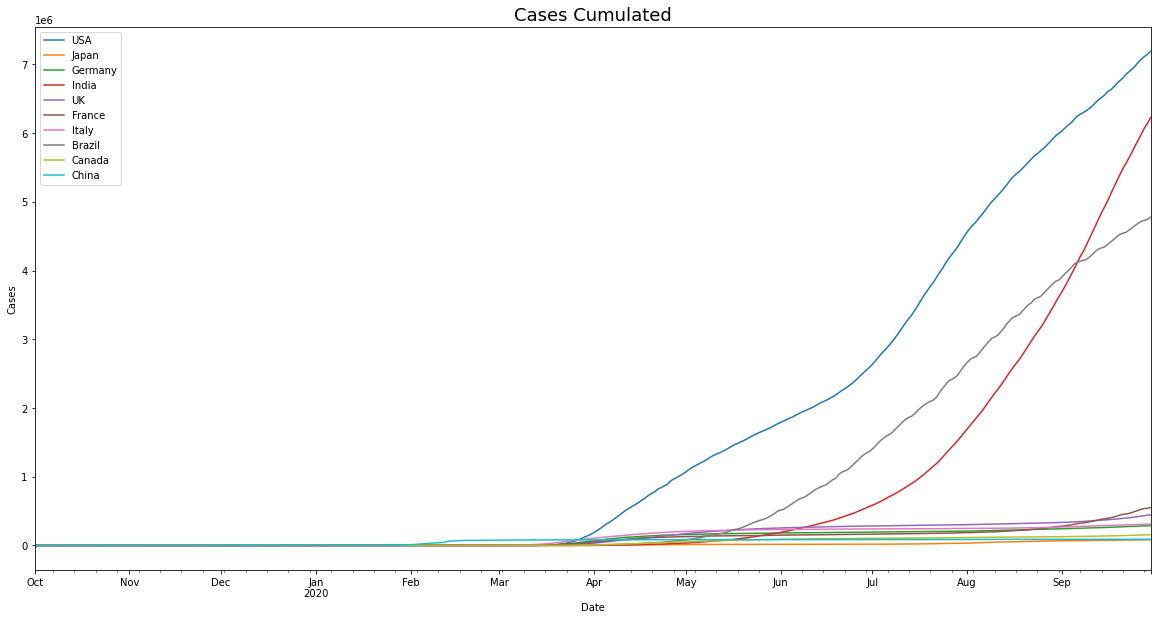

In [8]:
#cases cumulated

plt.figure(figsize=(20,10))
ax = df_corona_usa["cases"].cumsum().plot(label="USA")
df_corona_japan["cases"].cumsum().plot(label="Japan")
df_corona_germany["cases"].cumsum().plot(label="Germany")
df_corona_india["cases"].cumsum().plot(label="India")
df_corona_uk["cases"].cumsum().plot(label="UK")
df_corona_france["cases"].cumsum().plot(label="France")
df_corona_italy["cases"].cumsum().plot(label="Italy")
df_corona_brazil["cases"].cumsum().plot(label="Brazil")
df_corona_canada["cases"].cumsum().plot(label="Canada")
df_corona_china["cases"].cumsum().plot(label="China")
ax.set_ylabel("Cases")
ax.set_xlabel("Date")
ax.set_title("Cases Cumulated", fontsize=18)
plt.legend(loc=2)
plt.show()

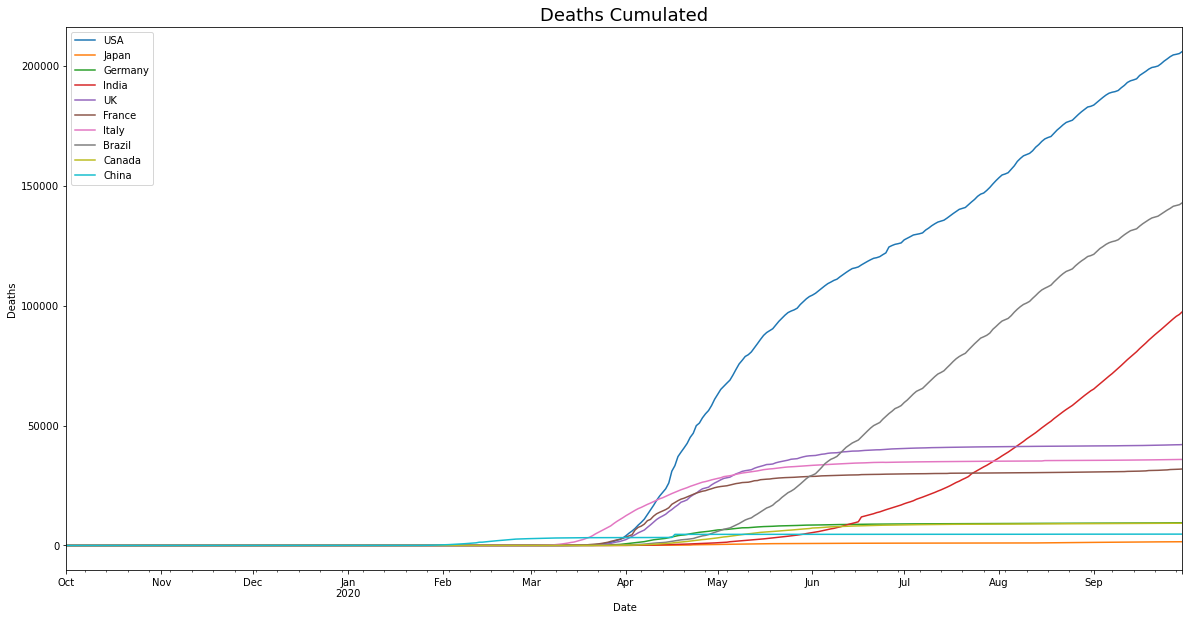

In [9]:
#deaths cumulated

plt.figure(figsize=(20,10))
ax = df_corona_usa["deaths"].cumsum().plot(label="USA")
df_corona_japan["deaths"].cumsum().plot(label="Japan")
df_corona_germany["deaths"].cumsum().plot(label="Germany")
df_corona_india["deaths"].cumsum().plot(label="India")
df_corona_uk["deaths"].cumsum().plot(label="UK")
df_corona_france["deaths"].cumsum().plot(label="France")
df_corona_italy["deaths"].cumsum().plot(label="Italy")
df_corona_brazil["deaths"].cumsum().plot(label="Brazil")
df_corona_canada["deaths"].cumsum().plot(label="Canada")
df_corona_china["deaths"].cumsum().plot(label="China")
ax.set_ylabel("Deaths")
ax.set_xlabel("Date")
ax.set_title("Deaths Cumulated", fontsize=18)
plt.legend(loc=2)
plt.show()

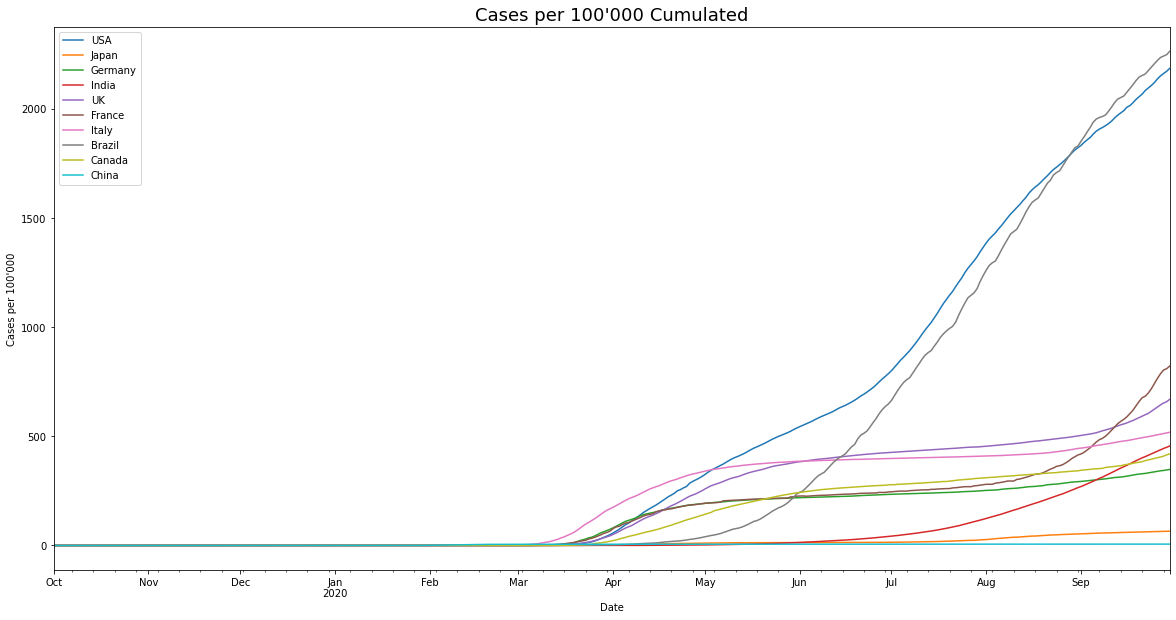

In [10]:
#cases per 100'000 cumulated

plt.figure(figsize=(20,10))
ax = ((df_corona_usa["cases"]/df_corona_usa["population"])*100000).cumsum().plot(label="USA")
((df_corona_japan["cases"]/df_corona_japan["population"])*100000).cumsum().plot(label="Japan")
((df_corona_germany["cases"]/df_corona_germany["population"])*100000).cumsum().plot(label="Germany")
((df_corona_india["cases"]/df_corona_india["population"])*100000).cumsum().plot(label="India")
((df_corona_uk["cases"]/df_corona_uk["population"])*100000).cumsum().plot(label="UK")
((df_corona_france["cases"]/df_corona_france["population"])*100000).cumsum().plot(label="France")
((df_corona_italy["cases"]/df_corona_italy["population"])*100000).cumsum().plot(label="Italy")
((df_corona_brazil["cases"]/df_corona_brazil["population"])*100000).cumsum().plot(label="Brazil")
((df_corona_canada["cases"]/df_corona_canada["population"])*100000).cumsum().plot(label="Canada")
((df_corona_china["cases"]/df_corona_china["population"])*100000).cumsum().plot(label="China")
ax.set_ylabel("Cases per 100'000")
ax.set_xlabel("Date")
ax.set_title("Cases per 100'000 Cumulated", fontsize=18)
plt.legend(loc=2)
plt.show()

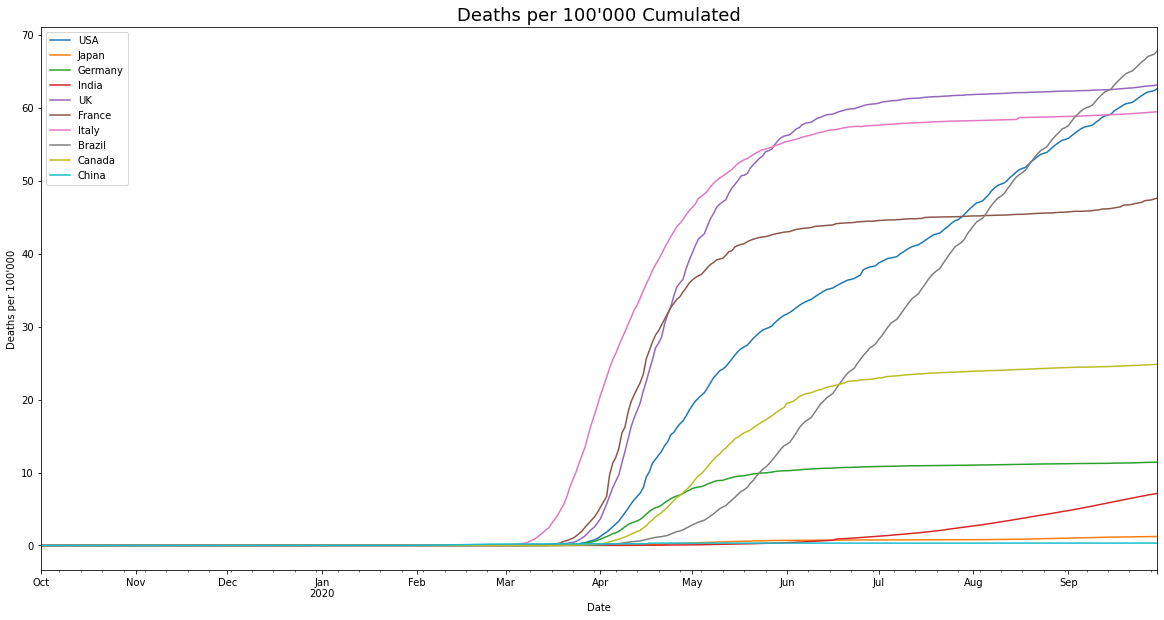

In [11]:
#deaths per 100'000 cumulated

plt.figure(figsize=(20,10))
ax = ((df_corona_usa["deaths"]/df_corona_usa["population"])*100000).cumsum().plot(label="USA")
((df_corona_japan["deaths"]/df_corona_japan["population"])*100000).cumsum().plot(label="Japan")
((df_corona_germany["deaths"]/df_corona_germany["population"])*100000).cumsum().plot(label="Germany")
((df_corona_india["deaths"]/df_corona_india["population"])*100000).cumsum().plot(label="India")
((df_corona_uk["deaths"]/df_corona_uk["population"])*100000).cumsum().plot(label="UK")
((df_corona_france["deaths"]/df_corona_france["population"])*100000).cumsum().plot(label="France")
((df_corona_italy["deaths"]/df_corona_italy["population"])*100000).cumsum().plot(label="Italy")
((df_corona_brazil["deaths"]/df_corona_brazil["population"])*100000).cumsum().plot(label="Brazil")
((df_corona_canada["deaths"]/df_corona_canada["population"])*100000).cumsum().plot(label="Canada")
((df_corona_china["deaths"]/df_corona_china["population"])*100000).cumsum().plot(label="China")
ax.set_ylabel("Deaths per 100'000")
ax.set_xlabel("Date")
ax.set_title("Deaths per 100'000 Cumulated", fontsize=18)
plt.legend(loc=2)
plt.show()

## Import indices and make dataframes

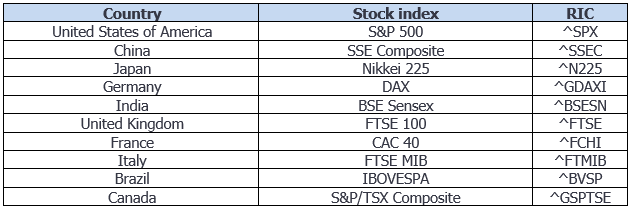


In [12]:
#import indices into dataframes and adjust index to datetime index

#S&P 500
df_sp500 = pd.read_csv("S&P500.csv", header=0, names=["date", "open", "high", "low", "close", "adj_close", "volume"])
df_sp500["date"] = pd.to_datetime(df_sp500["date"], format="%Y-%m-%d")

#SSE Composite
df_ssec = pd.read_csv("SSEC.csv", header=0, names=["date", "open", "high", "low", "close", "adj_close", "volume"])
df_ssec["date"] = pd.to_datetime(df_ssec["date"], format="%Y-%m-%d")


#Nikkei 225
df_n225 = pd.read_csv("N225.csv", header=0, names=["date", "open", "high", "low", "close", "adj_close", "volume"])
df_n225["date"] = pd.to_datetime(df_n225["date"], format="%Y-%m-%d")

#DAX
df_dax = pd.read_csv("DAX.csv", header=0, names=["date", "open", "high", "low", "close", "adj_close", "volume"])
df_dax["date"] = pd.to_datetime(df_dax["date"], format="%Y-%m-%d")

#BSE Sensex
df_bsesn = pd.read_csv("BSESN.csv", header=0, names=["date", "open", "high", "low", "close", "adj_close", "volume"])
df_bsesn["date"] = pd.to_datetime(df_bsesn["date"], format="%Y-%m-%d")

#FTSE 100
df_ftse = pd.read_csv("FTSE.csv", header=0, names=["date", "open", "high", "low", "close", "adj_close", "volume"])
df_ftse["date"] = pd.to_datetime(df_ftse["date"], format="%Y-%m-%d")

#CAC 40
df_fchi = pd.read_csv("FCHI.csv", header=0, names=["date", "open", "high", "low", "close", "adj_close", "volume"])
df_fchi["date"] = pd.to_datetime(df_fchi["date"], format="%Y-%m-%d")

#FTSE MIB
df_ftmib = pd.read_csv("FTMIB.csv", header=0, names=["date", "open", "high", "low", "close", "adj_close", "volume"])
df_ftmib["date"] = pd.to_datetime(df_ftmib["date"], format="%Y-%m-%d")

#IBOVESPA
df_bvsp = pd.read_csv("BVSP.csv", header=0, names=["date", "open", "high", "low", "close", "adj_close", "volume"])
df_bvsp["date"] = pd.to_datetime(df_bvsp["date"], format="%Y-%m-%d")

#S&P/TSX Composite
df_gsptse = pd.read_csv("GSPTSE.csv", header=0, names=["date", "open", "high", "low", "close", "adj_close", "volume"])
df_gsptse["date"] = pd.to_datetime(df_gsptse["date"], format="%Y-%m-%d")

#list of index-dataframes
indices_list=[df_sp500, df_ssec, df_n225, df_dax, df_bsesn, df_ftse, df_fchi, df_ftmib, df_bvsp, df_gsptse]

#set date as the index and sort by date
for i in indices_list:
    i.set_index("date", inplace=True)
    i.sort_index(inplace=True)

#reindex the dataframes with the correct time series and interpolate the values over the weekend
df_sp500 = df_sp500.reindex(t_index).interpolate()
df_ssec = df_ssec.reindex(t_index).interpolate()
df_n225 = df_n225.reindex(t_index).interpolate()
df_dax = df_dax.reindex(t_index).interpolate()
df_bsesn = df_bsesn.reindex(t_index).interpolate()
df_ftse = df_ftse.reindex(t_index).interpolate()
df_fchi = df_fchi.reindex(t_index).interpolate()
df_ftmib = df_ftmib.reindex(t_index).interpolate()
df_bvsp = df_bvsp.reindex(t_index).interpolate()
df_gsptse = df_gsptse.reindex(t_index).interpolate()

#interpolate missing values for china
df_ssec["adj_close"]["2019-10-01"] = 2927.92
df_ssec = df_ssec.interpolate()


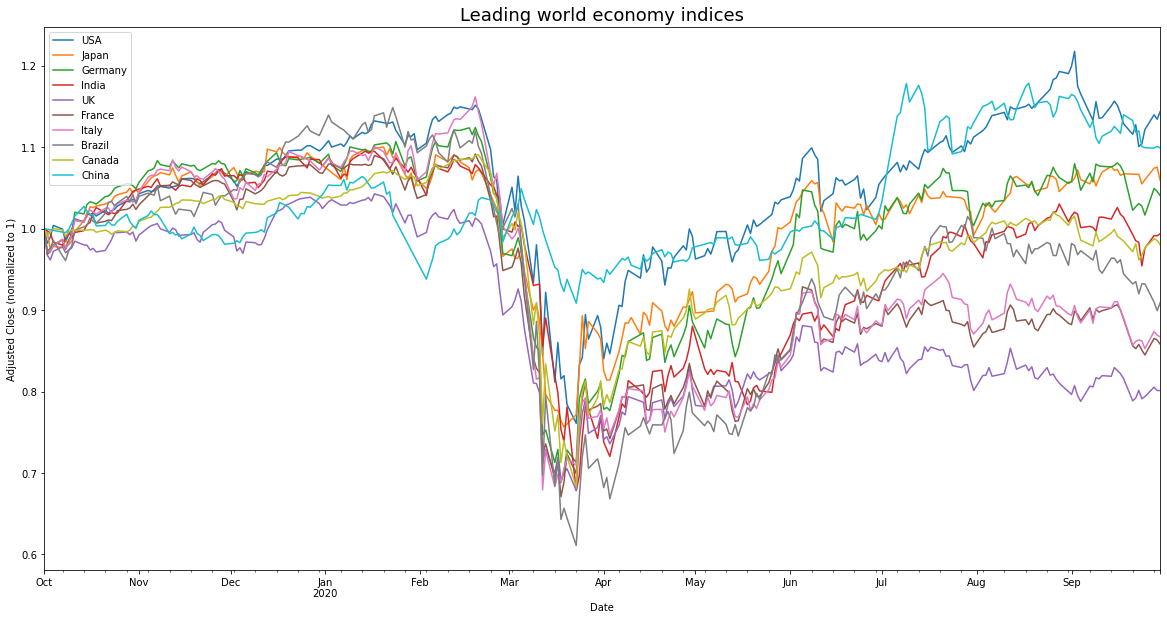

In [13]:
#plot indices (normalize to 1 for October 1st 2019)

plt.figure(figsize=(20,10))
ax = (df_sp500["adj_close"]/df_sp500["adj_close"]["2019-10-01"]).plot(label="USA")
(df_n225["adj_close"]/df_n225["adj_close"]["2019-10-01"]).plot(label="Japan")
(df_dax["adj_close"]/df_dax["adj_close"]["2019-10-01"]).plot(label="Germany")
(df_bsesn["adj_close"]/df_bsesn["adj_close"]["2019-10-01"]).plot(label="India")
(df_ftse["adj_close"]/df_ftse["adj_close"]["2019-10-01"]).plot(label="UK")
(df_fchi["adj_close"]/df_fchi["adj_close"]["2019-10-01"]).plot(label="France")
(df_ftmib["adj_close"]/df_ftmib["adj_close"]["2019-10-01"]).plot(label="Italy")
(df_bvsp["adj_close"]/df_bvsp["adj_close"]["2019-10-01"]).plot(label="Brazil")
(df_gsptse["adj_close"]/df_gsptse["adj_close"]["2019-10-01"]).plot(label="Canada")
(df_ssec["adj_close"]/df_ssec["adj_close"]["2019-10-01"]).plot(label="China")
ax.set_ylabel("Adjusted Close (normalized to 1)")
ax.set_xlabel("Date")
ax.set_title("Leading world economy indices", fontsize=18)
plt.legend(loc=2)
plt.show()

## Calculate simple correlations between deaths / cases and price jumps the next day

In [23]:
# We shift indices by one day, since cases / deaths from the last day are usually only reported the next day
# Shift dataframes by -1 period and correlate cases and deaths

# USA
df_sp500_shifted = df_sp500.shift(periods=-1)
corr_deaths_usa = df_corona_usa["deaths"].corr(df_sp500_shifted["adj_close"])
corr_cases_usa = df_corona_usa["cases"].corr(df_sp500_shifted["adj_close"])

# China
df_ssec_shifted = df_ssec.shift(periods=-1)
corr_deaths_china = df_corona_china["deaths"].corr(df_ssec_shifted["adj_close"])
corr_cases_china = df_corona_china["cases"].corr(df_ssec_shifted["adj_close"])

# Japan
df_n225_shifted = df_n225.shift(periods=-1)
corr_deaths_japan = df_corona_japan["deaths"].corr(df_n225_shifted["adj_close"])
corr_cases_japan = df_corona_japan["cases"].corr(df_n225_shifted["adj_close"])

# Germany
df_dax_shifted = df_dax.shift(periods=-1)
corr_deaths_germany = df_corona_germany["deaths"].corr(df_dax_shifted["adj_close"])
corr_cases_germany = df_corona_germany["cases"].corr(df_dax_shifted["adj_close"])

# India
df_bsesn_shifted = df_bsesn.shift(periods=-1)
corr_deaths_india = df_corona_india["deaths"].corr(df_bsesn_shifted["adj_close"])
corr_cases_india = df_corona_india["cases"].corr(df_bsesn_shifted["adj_close"])

# UK
df_ftse_shifted = df_ftse.shift(periods=-1)
corr_deaths_uk = df_corona_uk["deaths"].corr(df_ftse_shifted["adj_close"])
corr_cases_uk = df_corona_uk["cases"].corr(df_ftse_shifted["adj_close"])

# France
df_fchi_shifted = df_fchi.shift(periods=-1)
corr_deaths_france = df_corona_france["deaths"].corr(df_fchi_shifted["adj_close"])
corr_cases_france = df_corona_france["cases"].corr(df_fchi_shifted["adj_close"])

# Italy
df_ftmib_shifted = df_ftmib.shift(periods=-1)
corr_deaths_italy = df_corona_italy["deaths"].corr(df_ftmib_shifted["adj_close"])
corr_cases_italy = df_corona_italy["cases"].corr(df_ftmib_shifted["adj_close"])

# Brazil
df_bvsp_shifted = df_bvsp.shift(periods=-1)
corr_deaths_brazil = df_corona_brazil["deaths"].corr(df_bvsp_shifted["adj_close"])
corr_cases_brazil = df_corona_brazil["cases"].corr(df_bvsp_shifted["adj_close"])

# Canada
df_gsptse_shifted = df_gsptse.shift(periods=-1)
corr_deaths_canada = df_corona_canada["deaths"].corr(df_gsptse_shifted["adj_close"])
corr_cases_canada = df_corona_canada["cases"].corr(df_gsptse_shifted["adj_close"])





# print a table containing all correlations
print(tabulate([["USA", round(corr_cases_usa, 3), round(corr_deaths_usa, 3)], 
                ["China", round(corr_cases_china, 3), round(corr_deaths_china, 3)], 
                ["Japan", round(corr_cases_japan, 3), round(corr_deaths_japan, 3)], 
                ["Germany", round(corr_cases_germany, 3), round(corr_deaths_germany, 3)], 
                ["India", round(corr_cases_india, 3), round(corr_deaths_india, 3)], 
                ["UK", round(corr_cases_uk, 3), round(corr_deaths_uk, 3)], 
                ["France", round(corr_cases_france, 3), round(corr_deaths_france, 3)], 
                ["Italy", round(corr_cases_italy, 3), round(corr_deaths_italy, 3)], 
                ["Brazil", round(corr_cases_brazil, 3), round(corr_deaths_brazil, 3)], 
                ["Canada", round(corr_cases_canada, 3), round(corr_deaths_canada, 3)]],
               headers=["Country", "Simple correlation between\n cases and stock prices", "Simple correlation between\n deaths and stock prices"]))



nan nan nan nan
Country      Simple correlation between    Simple correlation between
                 cases and stock prices       deaths and stock prices
---------  ----------------------------  ----------------------------
USA                               0.22                         -0.143
China                            -0.122                        -0.092
Japan                             0.009                        -0.273
Germany                          -0.625                        -0.585
India                             0.102                         0.039
UK                               -0.668                        -0.45
France                           -0.375                        -0.462
Italy                            -0.718                        -0.659
Brazil                           -0.076                        -0.211
Canada                           -0.541                        -0.442


Correlation over the whole time interval seems not very meaningful, therefore let's look at the correlation from the start of the Corona Virus (the first reported cases in the dataset occured on the 31st of December in China).

In [15]:
#correlate cases and deaths with indices only starting from the 31st of December

# USA
corr_deaths_usa = df_corona_usa["2019-12-31":]["deaths"].corr(df_sp500_shifted["2019-12-31":]["adj_close"])
corr_cases_usa = df_corona_usa["2019-12-31":]["cases"].corr(df_sp500_shifted["2019-12-31":]["adj_close"])

# China
corr_deaths_china = df_corona_china["2019-12-31":]["deaths"].corr(df_ssec_shifted["2019-12-31":]["adj_close"])
corr_cases_china = df_corona_china["2019-12-31":]["cases"].corr(df_ssec_shifted["2019-12-31":]["adj_close"])

# Japan
corr_deaths_japan = df_corona_japan["2019-12-31":]["deaths"].corr(df_n225_shifted["2019-12-31":]["adj_close"])
corr_cases_japan = df_corona_japan["2019-12-31":]["cases"].corr(df_n225_shifted["2019-12-31":]["adj_close"])

# Germany
corr_deaths_germany = df_corona_germany["2019-12-31":]["deaths"].corr(df_dax_shifted["2019-12-31":]["adj_close"])
corr_cases_germany = df_corona_germany["2019-12-31":]["cases"].corr(df_dax_shifted["2019-12-31":]["adj_close"])

# India
corr_deaths_india = df_corona_india["2019-12-31":]["deaths"].corr(df_bsesn_shifted["2019-12-31":]["adj_close"])
corr_cases_india = df_corona_india["2019-12-31":]["cases"].corr(df_bsesn_shifted["2019-12-31":]["adj_close"])

# UK
corr_deaths_uk = df_corona_uk["2019-12-31":]["deaths"].corr(df_ftse_shifted["2019-12-31":]["adj_close"])
corr_cases_uk = df_corona_uk["2019-12-31":]["cases"].corr(df_ftse_shifted["2019-12-31":]["adj_close"])

# France
corr_deaths_france = df_corona_france["2019-12-31":]["deaths"].corr(df_fchi_shifted["2019-12-31":]["adj_close"])
corr_cases_france = df_corona_france["2019-12-31":]["cases"].corr(df_fchi_shifted["2019-12-31":]["adj_close"])

# Italy
corr_deaths_italy = df_corona_italy["2019-12-31":]["deaths"].corr(df_ftmib_shifted["2019-12-31":]["adj_close"])
corr_cases_italy = df_corona_italy["2019-12-31":]["cases"].corr(df_ftmib_shifted["2019-12-31":]["adj_close"])

# Brazil
corr_deaths_brazil = df_corona_brazil["2019-12-31":]["deaths"].corr(df_bvsp_shifted["2019-12-31":]["adj_close"])
corr_cases_brazil = df_corona_brazil["2019-12-31":]["cases"].corr(df_bvsp_shifted["2019-12-31":]["adj_close"])

# Canada
corr_deaths_canada = df_corona_canada["2019-12-31":]["deaths"].corr(df_gsptse_shifted["2019-12-31":]["adj_close"])
corr_cases_canada = df_corona_canada["2019-12-31":]["cases"].corr(df_gsptse_shifted["2019-12-31":]["adj_close"])


# print a table containing all correlations
print(tabulate([["USA", round(corr_cases_usa, 3), round(corr_deaths_usa, 3)], 
                ["China", round(corr_cases_china, 3), round(corr_deaths_china, 3)], 
                ["Japan", round(corr_cases_japan, 3), round(corr_deaths_japan, 3)], 
                ["Germany", round(corr_cases_germany, 3), round(corr_deaths_germany, 3)], 
                ["India", round(corr_cases_india, 3), round(corr_deaths_india, 3)], 
                ["UK", round(corr_cases_uk, 3), round(corr_deaths_uk, 3)], 
                ["France", round(corr_cases_france, 3), round(corr_deaths_france, 3)], 
                ["Italy", round(corr_cases_italy, 3), round(corr_deaths_italy, 3)], 
                ["Brazil", round(corr_cases_brazil, 3), round(corr_deaths_brazil, 3)], 
                ["Canada", round(corr_cases_canada, 3), round(corr_deaths_canada, 3)]],
               headers=["Country", "Correlation between\n cases and stock prices", "Correlation between\n deaths and stock prices"]))



Country          Correlation between         Correlation between
              cases and stock prices     deaths and stock prices
---------  -------------------------  --------------------------
USA                            0.246                      -0.176
China                         -0.159                      -0.119
Japan                          0.132                      -0.205
Germany                       -0.585                      -0.557
India                          0.303                       0.255
UK                            -0.575                      -0.378
France                        -0.261                      -0.422
Italy                         -0.675                      -0.63
Brazil                         0.111                      -0.031
Canada                        -0.464                      -0.379


As expected, the correlation coefficients are stronger when only looking at data since the start of Coronavirus reporting. However for some cases it still seems counterintuitive (for example, positive correlation between deaths and stock prices in the USA). One reason for this may be that public sentiment was only strongly influenced by the Coronavirus in certain periods. In order to test this hypothesis, we are going to look at the correlation for the first three quarters of 2020 in isolation. 
- Q1: 01.01.2020-31.03.2020
- Q2: 01.04.2020-30.06.2020
- Q3: 01.07.2020-30.09.2020

In [16]:
#create quarterly correlations

# USA Q1
corr_deaths_usa_q1 = df_corona_usa["2020-01-01":"2020-03-31"]["deaths"].corr(df_sp500_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_usa_q1 = df_corona_usa["2020-01-01":"2020-03-31"]["cases"].corr(df_sp500_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# USA Q2
corr_deaths_usa_q2 = df_corona_usa["2020-04-01":"2020-06-30"]["deaths"].corr(df_sp500_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_usa_q2 = df_corona_usa["2020-04-01":"2020-06-30"]["cases"].corr(df_sp500_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# USA Q3
corr_deaths_usa_q3 = df_corona_usa["2020-07-01":"2020-09-30"]["deaths"].corr(df_sp500_shifted["2020-07-01":"2020-09-30"]["adj_close"])
corr_cases_usa_q3 = df_corona_usa["2020-07-01":"2020-09-30"]["cases"].corr(df_sp500_shifted["2020-07-01":"2020-09-30"]["adj_close"])


# China Q1
corr_deaths_china_q1 = df_corona_china["2020-01-01":"2020-03-31"]["deaths"].corr(df_ssec_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_china_q1 = df_corona_china["2020-01-01":"2020-03-31"]["cases"].corr(df_ssec_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# China Q2
corr_deaths_china_q2 = df_corona_china["2020-04-01":"2020-06-30"]["deaths"].corr(df_ssec_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_china_q2 = df_corona_china["2020-04-01":"2020-06-30"]["cases"].corr(df_ssec_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# China Q3
corr_deaths_china_q3 = df_corona_china["2020-07-01":"2020-09-30"]["deaths"].corr(df_ssec_shifted["2020-07-01":"2020-09-30"]["adj_close"])
corr_cases_china_q3 = df_corona_china["2020-07-01":"2020-09-30"]["cases"].corr(df_ssec_shifted["2020-07-01":"2020-09-30"]["adj_close"])


# Japan Q1
corr_deaths_japan_q1 = df_corona_japan["2020-01-01":"2020-03-31"]["deaths"].corr(df_n225_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_japan_q1 = df_corona_japan["2020-01-01":"2020-03-31"]["cases"].corr(df_n225_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# Japan Q2
corr_deaths_japan_q2 = df_corona_japan["2020-04-01":"2020-06-30"]["deaths"].corr(df_n225_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_japan_q2 = df_corona_japan["2020-04-01":"2020-06-30"]["cases"].corr(df_n225_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# Japan Q3
corr_deaths_japan_q3 = df_corona_japan["2020-07-01":"2020-09-30"]["deaths"].corr(df_n225_shifted["2020-07-01":"2020-09-30"]["adj_close"])
corr_cases_japan_q3 = df_corona_japan["2020-07-01":"2020-09-30"]["cases"].corr(df_n225_shifted["2020-07-01":"2020-09-30"]["adj_close"])


# Germany Q1
corr_deaths_germany_q1 = df_corona_germany["2020-01-01":"2020-03-31"]["deaths"].corr(df_dax_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_germany_q1 = df_corona_germany["2020-01-01":"2020-03-31"]["cases"].corr(df_dax_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# Germany Q2
corr_deaths_germany_q2 = df_corona_germany["2020-04-01":"2020-06-30"]["deaths"].corr(df_dax_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_germany_q2 = df_corona_germany["2020-04-01":"2020-06-30"]["cases"].corr(df_dax_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# Germany Q3
corr_deaths_germany_q3 = df_corona_germany["2020-07-01":"2020-09-30"]["deaths"].corr(df_dax_shifted["2020-07-01":"2020-09-30"]["adj_close"])
corr_cases_germany_q3 = df_corona_germany["2020-07-01":"2020-09-30"]["cases"].corr(df_dax_shifted["2020-07-01":"2020-09-30"]["adj_close"])


# India Q1
corr_deaths_india_q1 = df_corona_india["2020-01-01":"2020-03-31"]["deaths"].corr(df_bsesn_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_india_q1 = df_corona_india["2020-01-01":"2020-03-31"]["cases"].corr(df_bsesn_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# India Q2
corr_deaths_india_q2 = df_corona_india["2020-04-01":"2020-06-30"]["deaths"].corr(df_bsesn_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_india_q2 = df_corona_india["2020-04-01":"2020-06-30"]["cases"].corr(df_bsesn_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# India Q3
corr_deaths_india_q3 = df_corona_india["2020-07-01":"2020-09-30"]["deaths"].corr(df_bsesn_shifted["2020-07-01":"2020-09-30"]["adj_close"])
corr_cases_india_q3 = df_corona_india["2020-07-01":"2020-09-30"]["cases"].corr(df_bsesn_shifted["2020-07-01":"2020-09-30"]["adj_close"])


# UK Q1
corr_deaths_uk_q1 = df_corona_uk["2020-01-01":"2020-03-31"]["deaths"].corr(df_ftse_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_uk_q1 = df_corona_uk["2020-01-01":"2020-03-31"]["cases"].corr(df_ftse_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# UK Q2
corr_deaths_uk_q2 = df_corona_uk["2020-04-01":"2020-06-30"]["deaths"].corr(df_ftse_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_uk_q2 = df_corona_uk["2020-04-01":"2020-06-30"]["cases"].corr(df_ftse_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# UK Q3
corr_deaths_uk_q3 = df_corona_uk["2020-07-01":"2020-09-30"]["deaths"].corr(df_ftse_shifted["2020-07-01":"2020-09-30"]["adj_close"])
corr_cases_uk_q3 = df_corona_uk["2020-07-01":"2020-09-30"]["cases"].corr(df_ftse_shifted["2020-07-01":"2020-09-30"]["adj_close"])


# France Q1
corr_deaths_france_q1 = df_corona_france["2020-01-01":"2020-03-31"]["deaths"].corr(df_fchi_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_france_q1 = df_corona_france["2020-01-01":"2020-03-31"]["cases"].corr(df_fchi_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# France Q2
corr_deaths_france_q2 = df_corona_france["2020-04-01":"2020-06-30"]["deaths"].corr(df_fchi_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_france_q2 = df_corona_france["2020-04-01":"2020-06-30"]["cases"].corr(df_fchi_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# France Q3
corr_deaths_france_q3 = df_corona_france["2020-07-01":"2020-09-30"]["deaths"].corr(df_fchi_shifted["2020-07-01":"2020-09-30"]["adj_close"])
corr_cases_france_q3 = df_corona_france["2020-07-01":"2020-09-30"]["cases"].corr(df_fchi_shifted["2020-07-01":"2020-09-30"]["adj_close"])


# Italy Q1
corr_deaths_italy_q1 = df_corona_italy["2020-01-01":"2020-03-31"]["deaths"].corr(df_ftmib_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_italy_q1 = df_corona_italy["2020-01-01":"2020-03-31"]["cases"].corr(df_ftmib_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# Italy Q2
corr_deaths_italy_q2 = df_corona_italy["2020-04-01":"2020-06-30"]["deaths"].corr(df_ftmib_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_italy_q2 = df_corona_italy["2020-04-01":"2020-06-30"]["cases"].corr(df_ftmib_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# Italy Q3
corr_deaths_italy_q3 = df_corona_italy["2020-07-01":"2020-09-30"]["deaths"].corr(df_ftmib_shifted["2020-07-01":"2020-09-30"]["adj_close"])
corr_cases_italy_q3 = df_corona_italy["2020-07-01":"2020-09-30"]["cases"].corr(df_ftmib_shifted["2020-07-01":"2020-09-30"]["adj_close"])


# Brazil Q1
corr_deaths_brazil_q1 = df_corona_brazil["2020-01-01":"2020-03-31"]["deaths"].corr(df_bvsp_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_brazil_q1 = df_corona_brazil["2020-01-01":"2020-03-31"]["cases"].corr(df_bvsp_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# Brazil Q2
corr_deaths_brazil_q2 = df_corona_brazil["2020-04-01":"2020-06-30"]["deaths"].corr(df_bvsp_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_brazil_q2 = df_corona_brazil["2020-04-01":"2020-06-30"]["cases"].corr(df_bvsp_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# Brazil Q3
corr_deaths_brazil_q3 = df_corona_brazil["2020-07-01":"2020-09-30"]["deaths"].corr(df_bvsp_shifted["2020-07-01":"2020-09-30"]["adj_close"])
corr_cases_brazil_q3 = df_corona_brazil["2020-07-01":"2020-09-30"]["cases"].corr(df_bvsp_shifted["2020-07-01":"2020-09-30"]["adj_close"])


# Canada Q1
corr_deaths_canada_q1 = df_corona_canada["2020-01-01":"2020-03-31"]["deaths"].corr(df_gsptse_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_canada_q1 = df_corona_canada["2020-01-01":"2020-03-31"]["cases"].corr(df_gsptse_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# Canada Q2
corr_deaths_canada_q2 = df_corona_canada["2020-04-01":"2020-06-30"]["deaths"].corr(df_gsptse_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_canada_q2 = df_corona_canada["2020-04-01":"2020-06-30"]["cases"].corr(df_gsptse_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# Canada Q3
corr_deaths_canada_q3 = df_corona_canada["2020-07-01":"2020-09-30"]["deaths"].corr(df_gsptse_shifted["2020-07-01":"2020-09-30"]["adj_close"])
corr_cases_canada_q3 = df_corona_canada["2020-07-01":"2020-09-30"]["cases"].corr(df_gsptse_shifted["2020-07-01":"2020-09-30"]["adj_close"])



#print all correlations
print(tabulate([["USA", round(corr_cases_usa_q1, 3), round(corr_deaths_usa_q1, 3), 
                 round(corr_cases_usa_q2, 3), round(corr_deaths_usa_q2, 3), 
                 round(corr_cases_usa_q3, 3), round(corr_deaths_usa_q3, 3)],
                ["China", round(corr_cases_china_q1, 3), round(corr_deaths_china_q1, 3), 
                 round(corr_cases_china_q2, 3), round(corr_deaths_china_q2, 3), 
                 round(corr_cases_china_q3, 3), round(corr_deaths_china_q3, 3)],
                ["Japan", round(corr_cases_japan_q1, 3), round(corr_deaths_japan_q1, 3), 
                 round(corr_cases_japan_q2, 3), round(corr_deaths_japan_q2, 3), 
                 round(corr_cases_japan_q3, 3), round(corr_deaths_japan_q3, 3)],
                ["Germany", round(corr_cases_germany_q1, 3), round(corr_deaths_germany_q1, 3), 
                 round(corr_cases_germany_q2, 3), round(corr_deaths_germany_q2, 3), 
                 round(corr_cases_germany_q3, 3), round(corr_deaths_germany_q3, 3)],
                ["India", round(corr_cases_india_q1, 3), round(corr_deaths_india_q1, 3), 
                 round(corr_cases_india_q2, 3), round(corr_deaths_india_q2, 3), 
                 round(corr_cases_india_q3, 3), round(corr_deaths_india_q3, 3)],
                ["UK", round(corr_cases_uk_q1, 3), round(corr_deaths_uk_q1, 3), 
                 round(corr_cases_uk_q2, 3), round(corr_deaths_uk_q2, 3), 
                 round(corr_cases_uk_q3, 3), round(corr_deaths_uk_q3, 3)],
                ["France", round(corr_cases_france_q1, 3), round(corr_deaths_france_q1, 3), 
                 round(corr_cases_france_q2, 3), round(corr_deaths_france_q2, 3), 
                 round(corr_cases_france_q3, 3), round(corr_deaths_france_q3, 3)],
                ["Italy", round(corr_cases_italy_q1, 3), round(corr_deaths_italy_q1, 3), 
                 round(corr_cases_italy_q2, 3), round(corr_deaths_italy_q2, 3), 
                 round(corr_cases_italy_q3, 3), round(corr_deaths_italy_q3, 3)],
                ["Brazil", round(corr_cases_brazil_q1, 3), round(corr_deaths_brazil_q1, 3), 
                 round(corr_cases_brazil_q2, 3), round(corr_deaths_brazil_q2, 3), 
                 round(corr_cases_brazil_q3, 3), round(corr_deaths_brazil_q3, 3)],
                ["Canada", round(corr_cases_canada_q1, 3), round(corr_deaths_canada_q1, 3), 
                 round(corr_cases_canada_q2, 3), round(corr_deaths_canada_q2, 3), 
                 round(corr_cases_canada_q3, 3), round(corr_deaths_canada_q3, 3)]
                ], headers=["Country", "Cases Q1", "Deaths Q1", "Cases Q2", "Deaths Q2", "Cases Q3", "Deaths Q3"]))



Country      Cases Q1    Deaths Q1    Cases Q2    Deaths Q2    Cases Q3    Deaths Q3
---------  ----------  -----------  ----------  -----------  ----------  -----------
USA            -0.576       -0.483      -0.188       -0.451      -0.536        0.097
China          -0.128        0.041      -0.262       -0.065       0.024        0.227
Japan          -0.664       -0.755      -0.646       -0.31       -0.164        0.546
Germany        -0.665       -0.465      -0.703       -0.734       0.174       -0.365
India          -0.75        -0.61        0.825        0.566       0.745        0.732
UK             -0.63        -0.484      -0.843       -0.72       -0.606        0.141
France         -0.679       -0.551      -0.484       -0.534      -0.386       -0.306
Italy          -0.863       -0.776      -0.677       -0.722      -0.564       -0.049
Brazil         -0.69        -0.57        0.854        0.743       0.274        0.235
Canada         -0.544       -0.461      -0.611       -0.081      

The strongest correlation seems to be among the indices:

In [59]:
#create new df with all adj_close values of the 10 leading indices
df_adjclose = pd.concat([df_sp500["adj_close"], df_ssec["adj_close"], df_n225["adj_close"], df_dax["adj_close"], df_bsesn["adj_close"], df_ftse["adj_close"], df_fchi["adj_close"], df_ftmib["adj_close"], df_bvsp["adj_close"], df_gsptse["adj_close"]], axis=1, 
                        keys=["S&P 500", "SSEC", "N225", "DAX", "BSESN", "FTSE", "FCHI", "FTMIB", "BVSP", "GSPTSE"])

List_indices = [df_sp500["adj_close"], df_ssec["adj_close"], df_n225["adj_close"], df_dax["adj_close"], df_bsesn["adj_close"], df_ftse["adj_close"], df_fchi["adj_close"], df_ftmib["adj_close"], df_bvsp["adj_close"], df_gsptse["adj_close"]]
 
for i in List_indices:
    for j in List_indices:
        x = stats.pearsonr(i,j)[1]
        print(x) 


0.0
2.188114200680005e-55
4.342407064182892e-128
2.7741697148902165e-129
4.904481449464376e-69
7.423977476514287e-18
3.1366679985151826e-32
2.5990280312790696e-35
2.1483123036910612e-71
4.9341904063289435e-101
2.188114200680005e-55
0.0
4.737029597156122e-24
6.045934545646249e-24
1.0433368058503421e-14
0.04220641794064545
0.3539518073903722
0.12499764860610943
2.4909422165583897e-11
2.9383614696433504e-13
4.342407064182892e-128
4.737029597156122e-24
0.0
1.2058300808487894e-264
4.4322514173648965e-117
1.1978567094948603e-54
1.731639274180213e-82
3.657763791069391e-83
3.165039590835395e-131
7.877833786943417e-148
2.7741697148902165e-129
6.045934545646249e-24
1.2058300808487894e-264
0.0
5.617766056108051e-139
6.558422124723815e-63
2.5100907485602387e-97
4.747087687692947e-102
9.827857951630969e-160
1.835247476825597e-185
4.904481449464376e-69
1.0433368058503421e-14
4.4322514173648965e-117
5.617766056108051e-139
0.0
5.0997270790420104e-89
5.396409366593567e-134
2.3306549187088736e-141
1.022

In [18]:
#get correlation of the indices
round(df_adjclose.corr(), 3)

,S&P 500,SSEC,N225,DAX,BSESN,FTSE,FCHI,FTMIB,BVSP,GSPTSE
S&P 500,1.000,0.701,0.893,0.894,0.756,0.429,0.565,0.587,0.764,0.845
SSEC,0.701,1.000,0.495,0.494,0.390,-0.106,0.049,0.080,0.340,0.369
N225,0.893,0.495,1.000,0.982,0.876,0.698,0.799,0.801,0.897,0.918
DAX,0.894,0.494,0.982,1.000,0.907,0.733,0.837,0.847,0.929,0.950
BSESN,0.756,0.390,0.876,0.907,1.000,0.817,0.901,0.910,0.964,0.936
FTSE,0.429,-0.106,0.698,0.733,0.817,1.000,0.976,0.959,0.866,0.819
FCHI,0.565,0.049,0.799,0.837,0.901,0.976,1.000,0.993,0.933,0.890
FTMIB,0.587,0.080,0.801,0.847,0.910,0.959,0.993,1.000,0.942,0.901
BVSP,0.764,0.340,0.897,0.929,0.964,0.866,0.933,0.942,1.000,0.952
GSPTSE,0.845,0.369,0.918,0.950,0.936,0.819,0.890,0.901,0.952,1.000


In [40]:
#correlate the sum of cases and deaths
df_sum_cases = (df_corona_usa["cases"] + df_corona_china["cases"] + df_corona_japan["cases"] + df_corona_germany["cases"] + df_corona_india["cases"]
                + df_corona_uk["cases"] + df_corona_france["cases"] + df_corona_italy["cases"] + df_corona_brazil["cases"] + df_corona_canada["cases"])

df_sum_deaths = (df_corona_usa["deaths"] + df_corona_china["deaths"] + df_corona_japan["deaths"] + df_corona_germany["deaths"] + df_corona_india["deaths"]
                + df_corona_uk["deaths"] + df_corona_france["deaths"] + df_corona_italy["deaths"] + df_corona_brazil["deaths"] + df_corona_canada["deaths"])




# USA
corr_deaths_usa = df_sum_deaths["2019-12-31":"2020-09-29"].corr(df_sp500_shifted["2019-12-31":"2020-09-29"]["adj_close"])
corr_cases_usa = df_sum_cases["2019-12-31":].corr(df_sp500_shifted["2019-12-31":]["adj_close"])

# China
corr_deaths_china = df_sum_deaths["2019-12-31":"2020-09-29"].corr(df_ssec_shifted["2019-12-31":"2020-09-29"]["adj_close"])
corr_cases_china = df_sum_cases["2019-12-31":"2020-09-29"].corr(df_ssec_shifted["2019-12-31":"2020-09-29"]["adj_close"])

# Japan
corr_deaths_japan = df_sum_deaths["2019-12-31":"2020-09-29"].corr(df_n225_shifted["2019-12-31":"2020-09-29"]["adj_close"])
corr_cases_japan = df_sum_cases["2019-12-31":"2020-09-29"].corr(df_n225_shifted["2019-12-31":"2020-09-29"]["adj_close"])

# Germany
corr_deaths_germany = df_sum_deaths["2019-12-31":"2020-09-29"].corr(df_dax_shifted["2019-12-31":"2020-09-29"]["adj_close"])
corr_cases_germany = df_sum_cases["2019-12-31":"2020-09-29"].corr(df_dax_shifted["2019-12-31":"2020-09-29"]["adj_close"])

# India
corr_deaths_india = df_sum_deaths["2019-12-31":"2020-09-29"].corr(df_bsesn_shifted["2019-12-31":"2020-09-29"]["adj_close"])
corr_cases_india = df_sum_cases["2019-12-31":"2020-09-29"].corr(df_bsesn_shifted["2019-12-31":"2020-09-29"]["adj_close"])

# UK
corr_deaths_uk = df_sum_deaths["2019-12-31":"2020-09-29"].corr(df_ftse_shifted["2019-12-31":"2020-09-29"]["adj_close"])
corr_cases_uk = df_sum_cases["2019-12-31":"2020-09-29"].corr(df_ftse_shifted["2019-12-31":"2020-09-29"]["adj_close"])

# France
corr_deaths_france = df_sum_deaths["2019-12-31":"2020-09-29"].corr(df_fchi_shifted["2019-12-31":"2020-09-29"]["adj_close"])
corr_cases_france = df_sum_cases["2019-12-31":"2020-09-29"].corr(df_fchi_shifted["2019-12-31":"2020-09-29"]["adj_close"])

# Italy
corr_deaths_italy = df_sum_deaths["2019-12-31":"2020-09-29"].corr(df_ftmib_shifted["2019-12-31":"2020-09-29"]["adj_close"])
corr_cases_italy = df_sum_cases["2019-12-31":"2020-09-29"].corr(df_ftmib_shifted["2019-12-31":"2020-09-29"]["adj_close"])

# Brazil
corr_deaths_brazil = df_sum_deaths["2019-12-31":"2020-09-29"].corr(df_bvsp_shifted["2019-12-31":"2020-09-29"]["adj_close"])
corr_cases_brazil = df_sum_cases["2019-12-31":"2020-09-29"].corr(df_bvsp_shifted["2019-12-31":"2020-09-29"]["adj_close"])

# Canada
corr_deaths_canada = df_sum_deaths["2019-12-31":"2020-09-29"].corr(df_gsptse_shifted["2019-12-31":"2020-09-29"]["adj_close"])
corr_cases_canada = df_sum_cases["2019-12-31":"2020-09-29"].corr(df_gsptse_shifted["2019-12-31":"2020-09-29"]["adj_close"])




# print a table containing all correlations
print(tabulate([["USA", round(corr_cases_usa, 3), round(corr_deaths_usa, 3)], 
                ["China", round(corr_cases_china, 3), round(corr_deaths_china, 3)], 
                ["Japan", round(corr_cases_japan, 3), round(corr_deaths_japan, 3)], 
                ["Germany", round(corr_cases_germany, 3), round(corr_deaths_germany, 3)], 
                ["India", round(corr_cases_india, 3), round(corr_deaths_india, 3)], 
                ["UK", round(corr_cases_uk, 3), round(corr_deaths_uk, 3)], 
                ["France", round(corr_cases_france, 3), round(corr_deaths_france, 3)], 
                ["Italy", round(corr_cases_italy, 3), round(corr_deaths_italy, 3)], 
                ["Brazil", round(corr_cases_brazil, 3), round(corr_deaths_brazil, 3)], 
                ["Canada", round(corr_cases_canada, 3), round(corr_deaths_canada, 3)]],
               headers=["Country", "Simple correlation between\n cases and stock prices", "Simple correlation between\n deaths and stock prices"]))

Country      Simple correlation between    Simple correlation between
                 cases and stock prices       deaths and stock prices
---------  ----------------------------  ----------------------------
USA                               0.437                        -0.144
China                             0.772                         0.087
Japan                             0.302                        -0.273
Germany                           0.271                        -0.303
India                             0.102                        -0.506
UK                               -0.437                        -0.626
France                           -0.26                         -0.608
Italy                            -0.238                        -0.623
Brazil                            0.017                        -0.531
Canada                            0.081                        -0.388


In [41]:
print(x)

2.8386944713716582e-11


In [57]:
#do the same for quarterly correlations

# USA Q1
corr_deaths_usa_q1 = df_sum_deaths["2020-01-01":"2020-03-31"].corr(df_sp500_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_usa_q1 = df_sum_cases["2020-01-01":"2020-03-31"].corr(df_sp500_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# USA Q2
corr_deaths_usa_q2 = df_sum_deaths["2020-04-01":"2020-06-30"].corr(df_sp500_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_usa_q2 = df_sum_cases["2020-04-01":"2020-06-30"].corr(df_sp500_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# USA Q3
corr_deaths_usa_q3 = df_sum_deaths["2020-07-01":"2020-09-29"].corr(df_sp500_shifted["2020-07-01":"2020-09-29"]["adj_close"])
corr_cases_usa_q3 = df_sum_cases["2020-07-01":"2020-09-29"].corr(df_sp500_shifted["2020-07-01":"2020-09-29"]["adj_close"])


# China Q1
corr_deaths_china_q1 = df_sum_deaths["2020-01-01":"2020-03-31"].corr(df_ssec_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_china_q1 = df_sum_cases["2020-01-01":"2020-03-31"].corr(df_ssec_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# China Q2
corr_deaths_china_q2 = df_sum_deaths["2020-04-01":"2020-06-30"].corr(df_ssec_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_china_q2 = df_sum_cases["2020-04-01":"2020-06-30"].corr(df_ssec_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# China Q3
corr_deaths_china_q3 = df_sum_deaths["2020-07-01":"2020-09-29"].corr(df_ssec_shifted["2020-07-01":"2020-09-29"]["adj_close"])
corr_cases_china_q3 = df_sum_cases["2020-07-01":"2020-09-29"].corr(df_ssec_shifted["2020-07-01":"2020-09-29"]["adj_close"])


# Japan Q1
corr_deaths_japan_q1 = df_sum_deaths["2020-01-01":"2020-03-31"].corr(df_n225_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_japan_q1 = df_sum_cases["2020-01-01":"2020-03-31"].corr(df_n225_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# Japan Q2
corr_deaths_japan_q2 = df_sum_deaths["2020-04-01":"2020-06-30"].corr(df_n225_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_japan_q2 = df_sum_cases["2020-04-01":"2020-06-30"].corr(df_n225_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# Japan Q3
corr_deaths_japan_q3 = df_sum_deaths["2020-07-01":"2020-09-29"].corr(df_n225_shifted["2020-07-01":"2020-09-29"]["adj_close"])
corr_cases_japan_q3 = df_sum_cases["2020-07-01":"2020-09-29"].corr(df_n225_shifted["2020-07-01":"2020-09-29"]["adj_close"])


# Germany Q1
corr_deaths_germany_q1 = df_sum_deaths["2020-01-01":"2020-03-31"].corr(df_dax_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_germany_q1 = df_sum_cases["2020-01-01":"2020-03-31"].corr(df_dax_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# Germany Q2
corr_deaths_germany_q2 = df_sum_deaths["2020-04-01":"2020-06-30"].corr(df_dax_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_germany_q2 = df_sum_cases["2020-04-01":"2020-06-30"].corr(df_dax_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# Germany Q3
corr_deaths_germany_q3 = df_sum_deaths["2020-07-01":"2020-09-29"].corr(df_dax_shifted["2020-07-01":"2020-09-29"]["adj_close"])
corr_cases_germany_q3 = df_sum_cases["2020-07-01":"2020-09-29"].corr(df_dax_shifted["2020-07-01":"2020-09-29"]["adj_close"])


# India Q1
corr_deaths_india_q1 = df_sum_deaths["2020-01-01":"2020-03-31"].corr(df_bsesn_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_india_q1 = df_sum_cases["2020-01-01":"2020-03-31"].corr(df_bsesn_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# India Q2
corr_deaths_india_q2 = df_sum_deaths["2020-04-01":"2020-06-30"].corr(df_bsesn_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_india_q2 = df_sum_cases["2020-04-01":"2020-06-30"].corr(df_bsesn_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# India Q3
corr_deaths_india_q3 = df_sum_deaths["2020-07-01":"2020-09-29"].corr(df_bsesn_shifted["2020-07-01":"2020-09-29"]["adj_close"])
corr_cases_india_q3 = df_sum_cases["2020-07-01":"2020-09-29"].corr(df_bsesn_shifted["2020-07-01":"2020-09-29"]["adj_close"])


# UK Q1
corr_deaths_uk_q1 = df_sum_deaths["2020-01-01":"2020-03-31"].corr(df_ftse_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_uk_q1 = df_sum_cases["2020-01-01":"2020-03-31"].corr(df_ftse_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# UK Q2
corr_deaths_uk_q2 = df_sum_deaths["2020-04-01":"2020-06-30"].corr(df_ftse_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_uk_q2 = df_sum_cases["2020-04-01":"2020-06-30"].corr(df_ftse_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# UK Q3
corr_deaths_uk_q3 = df_sum_deaths["2020-07-01":"2020-09-29"].corr(df_ftse_shifted["2020-07-01":"2020-09-29"]["adj_close"])
corr_cases_uk_q3 = df_sum_cases["2020-07-01":"2020-09-29"].corr(df_ftse_shifted["2020-07-01":"2020-09-29"]["adj_close"])


# France Q1
corr_deaths_france_q1 = df_sum_deaths["2020-01-01":"2020-03-31"].corr(df_fchi_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_france_q1 = df_sum_cases["2020-01-01":"2020-03-31"].corr(df_fchi_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# France Q2
corr_deaths_france_q2 = df_sum_deaths["2020-04-01":"2020-06-30"].corr(df_fchi_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_france_q2 = df_sum_cases["2020-04-01":"2020-06-30"].corr(df_fchi_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# France Q3
corr_deaths_france_q3 = df_sum_deaths["2020-07-01":"2020-09-29"].corr(df_fchi_shifted["2020-07-01":"2020-09-29"]["adj_close"])
corr_cases_france_q3 = df_sum_cases["2020-07-01":"2020-09-29"].corr(df_fchi_shifted["2020-07-01":"2020-09-29"]["adj_close"])


# Italy Q1
corr_deaths_italy_q1 = df_sum_deaths["2020-01-01":"2020-03-31"].corr(df_ftmib_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_italy_q1 = df_sum_cases["2020-01-01":"2020-03-31"].corr(df_ftmib_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# Italy Q2
corr_deaths_italy_q2 = df_sum_deaths["2020-04-01":"2020-06-30"].corr(df_ftmib_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_italy_q2 = df_sum_cases["2020-04-01":"2020-06-30"].corr(df_ftmib_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# Italy Q3
corr_deaths_italy_q3 = df_sum_deaths["2020-07-01":"2020-09-29"].corr(df_ftmib_shifted["2020-07-01":"2020-09-29"]["adj_close"])
corr_cases_italy_q3 = df_sum_cases["2020-07-01":"2020-09-29"].corr(df_ftmib_shifted["2020-07-01":"2020-09-29"]["adj_close"])


# Brazil Q1
corr_deaths_brazil_q1 = df_sum_deaths["2020-01-01":"2020-03-31"].corr(df_bvsp_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_brazil_q1 = df_sum_cases["2020-01-01":"2020-03-31"].corr(df_bvsp_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# Brazil Q2
corr_deaths_brazil_q2 = df_sum_deaths["2020-04-01":"2020-06-30"].corr(df_bvsp_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_brazil_q2 = df_sum_cases["2020-04-01":"2020-06-30"].corr(df_bvsp_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# Brazil Q3
corr_deaths_brazil_q3 = df_sum_deaths["2020-07-01":"2020-09-29"].corr(df_bvsp_shifted["2020-07-01":"2020-09-29"]["adj_close"])
corr_cases_brazil_q3 = df_sum_cases["2020-07-01":"2020-09-29"].corr(df_bvsp_shifted["2020-07-01":"2020-09-29"]["adj_close"])


# Canada Q1
corr_deaths_canada_q1 = df_sum_deaths["2020-01-01":"2020-03-31"].corr(df_gsptse_shifted["2020-01-01":"2020-03-31"]["adj_close"])
corr_cases_canada_q1 = df_sum_cases["2020-01-01":"2020-03-31"].corr(df_gsptse_shifted["2020-01-01":"2020-03-31"]["adj_close"])

# Canada Q2
corr_deaths_canada_q2 = df_sum_deaths["2020-04-01":"2020-06-30"].corr(df_gsptse_shifted["2020-04-01":"2020-06-30"]["adj_close"])
corr_cases_canada_q2 = df_sum_cases["2020-04-01":"2020-06-30"].corr(df_gsptse_shifted["2020-04-01":"2020-06-30"]["adj_close"])

# Canada Q3
corr_deaths_canada_q3 = df_sum_deaths["2020-07-01":"2020-09-29"].corr(df_gsptse_shifted["2020-07-01":"2020-09-29"]["adj_close"])
corr_cases_canada_q3 = df_sum_cases["2020-07-01":"2020-09-29"].corr(df_gsptse_shifted["2020-07-01":"2020-09-29"]["adj_close"])





#print all correlations
print(tabulate([["USA", round(corr_cases_usa_q1, 3), round(corr_deaths_usa_q1, 3), 
                 round(corr_cases_usa_q2, 3), round(corr_deaths_usa_q2, 3), 
                 round(corr_cases_usa_q3, 3), round(corr_deaths_usa_q3, 3)],
                ["China", round(corr_cases_china_q1, 3), round(corr_deaths_china_q1, 3), 
                 round(corr_cases_china_q2, 3), round(corr_deaths_china_q2, 3), 
                 round(corr_cases_china_q3, 3), round(corr_deaths_china_q3, 3)],
                ["Japan", round(corr_cases_japan_q1, 3), round(corr_deaths_japan_q1, 3), 
                 round(corr_cases_japan_q2, 3), round(corr_deaths_japan_q2, 3), 
                 round(corr_cases_japan_q3, 3), round(corr_deaths_japan_q3, 3)],
                ["Germany", round(corr_cases_germany_q1, 3), round(corr_deaths_germany_q1, 3), 
                 round(corr_cases_germany_q2, 3), round(corr_deaths_germany_q2, 3), 
                 round(corr_cases_germany_q3, 3), round(corr_deaths_germany_q3, 3)],
                ["India", round(corr_cases_india_q1, 3), round(corr_deaths_india_q1, 3), 
                 round(corr_cases_india_q2, 3), round(corr_deaths_india_q2, 3), 
                 round(corr_cases_india_q3, 3), round(corr_deaths_india_q3, 3)],
                ["UK", round(corr_cases_uk_q1, 3), round(corr_deaths_uk_q1, 3), 
                 round(corr_cases_uk_q2, 3), round(corr_deaths_uk_q2, 3), 
                 round(corr_cases_uk_q3, 3), round(corr_deaths_uk_q3, 3)],
                ["France", round(corr_cases_france_q1, 3), round(corr_deaths_france_q1, 3), 
                 round(corr_cases_france_q2, 3), round(corr_deaths_france_q2, 3), 
                 round(corr_cases_france_q3, 3), round(corr_deaths_france_q3, 3)],
                ["Italy", round(corr_cases_italy_q1, 3), round(corr_deaths_italy_q1, 3), 
                 round(corr_cases_italy_q2, 3), round(corr_deaths_italy_q2, 3), 
                 round(corr_cases_italy_q3, 3), round(corr_deaths_italy_q3, 3)],
                ["Brazil", round(corr_cases_brazil_q1, 3), round(corr_deaths_brazil_q1, 3), 
                 round(corr_cases_brazil_q2, 3), round(corr_deaths_brazil_q2, 3), 
                 round(corr_cases_brazil_q3, 3), round(corr_deaths_brazil_q3, 3)],
                ["Canada", round(corr_cases_canada_q1, 3), round(corr_deaths_canada_q1, 3), 
                 round(corr_cases_canada_q2, 3), round(corr_deaths_canada_q2, 3), 
                 round(corr_cases_canada_q3, 3), round(corr_deaths_canada_q3, 3)]
                ], headers=["Country", "Cases Q1", "Deaths Q1", "Cases Q2", "Deaths Q2", "Cases Q3", "Deaths Q3"]))


print("\n\n")


#p-values
List_Corona_Q1 = [df_sum_deaths["2020-01-01":"2020-03-31"], df_sum_cases["2020-01-01":"2020-03-31"]]
List_Indices_Q1 = [df_sp500_shifted["2020-01-01":"2020-03-31"]["adj_close"], df_ssec_shifted["2020-01-01":"2020-03-31"]["adj_close"], df_n225_shifted["2020-01-01":"2020-03-31"]["adj_close"], 
                   df_dax_shifted["2020-01-01":"2020-03-31"]["adj_close"], df_bsesn_shifted["2020-01-01":"2020-03-31"]["adj_close"], df_ftse_shifted["2020-01-01":"2020-03-31"]["adj_close"], df_fchi_shifted["2020-01-01":"2020-03-31"]["adj_close"], df_ftmib_shifted["2020-01-01":"2020-03-31"]["adj_close"],
                  df_bvsp_shifted["2020-01-01":"2020-03-31"]["adj_close"], df_gsptse_shifted["2020-01-01":"2020-03-31"]["adj_close"]]

for i in List_Corona_Q1:
    for j in List_Indices_Q1:
        x = stats.pearsonr(i,j)[1]
        print(x)
        
        
#p-values
List_Corona_Q2 = [df_sum_deaths["2020-04-01":"2020-06-30"], df_sum_cases["2020-04-01":"2020-06-30"]]
List_Indices_Q2 = [df_sp500_shifted["2020-04-01":"2020-06-30"]["adj_close"], df_ssec_shifted["2020-04-01":"2020-06-30"]["adj_close"], df_n225_shifted["2020-04-01":"2020-06-30"]["adj_close"], 
                   df_dax_shifted["2020-04-01":"2020-06-30"]["adj_close"], df_bsesn_shifted["2020-04-01":"2020-06-30"]["adj_close"], df_ftse_shifted["2020-04-01":"2020-06-30"]["adj_close"],
                  df_fchi_shifted["2020-04-01":"2020-06-30"]["adj_close"], df_ftmib_shifted["2020-04-01":"2020-06-30"]["adj_close"],
                  df_bvsp_shifted["2020-04-01":"2020-06-30"]["adj_close"], df_gsptse_shifted["2020-04-01":"2020-06-30"]["adj_close"]]

for i in List_Corona_Q2:
    for j in List_Indices_Q2:
        x = stats.pearsonr(i,j)[1]
        print(x)
                   
                   

#p-values
List_Corona_Q3 = [df_sum_deaths["2020-07-01":"2020-09-29"], df_sum_cases["2020-07-01":"2020-09-29"]]
List_Indices_Q3 = [df_sp500_shifted["2020-07-01":"2020-09-29"]["adj_close"], df_ssec_shifted["2020-07-01":"2020-09-29"]["adj_close"], df_n225_shifted["2020-07-01":"2020-09-29"]["adj_close"], 
                   df_dax_shifted["2020-07-01":"2020-09-29"]["adj_close"], df_bsesn_shifted["2020-07-01":"2020-09-29"]["adj_close"], df_ftse_shifted["2020-07-01":"2020-09-29"]["adj_close"],
                  df_fchi_shifted["2020-07-01":"2020-09-29"]["adj_close"], df_ftmib_shifted["2020-07-01":"2020-09-29"]["adj_close"],
                  df_bvsp_shifted["2020-07-01":"2020-09-29"]["adj_close"], df_gsptse_shifted["2020-07-01":"2020-09-29"]["adj_close"]]

for i in List_Corona_Q3:
    for j in List_Indices_Q3:
        x = stats.pearsonr(i,j)[1]
        print(x)


Country      Cases Q1    Deaths Q1    Cases Q2    Deaths Q2    Cases Q3    Deaths Q3
---------  ----------  -----------  ----------  -----------  ----------  -----------
USA            -0.651       -0.662       0.448       -0.511       0.4          0.15
China          -0.653       -0.614       0.626       -0.543      -0.074       -0.01
Japan          -0.575       -0.595       0.548       -0.578       0.33        -0.095
Germany        -0.617       -0.632       0.574       -0.574       0.075       -0.094
India          -0.782       -0.788       0.638       -0.388       0.476        0.173
UK             -0.633       -0.646       0.456       -0.558      -0.59        -0.202
France         -0.618       -0.634       0.588       -0.495      -0.41        -0.203
Italy          -0.619       -0.637       0.615       -0.555      -0.436       -0.154
Brazil         -0.704       -0.713       0.649       -0.573      -0.044        0.149
Canada         -0.681       -0.689       0.412       -0.531       0